# Polynomial Regression
Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables we add some polynomial terms to linear regression to convert it into Polynomial regression.

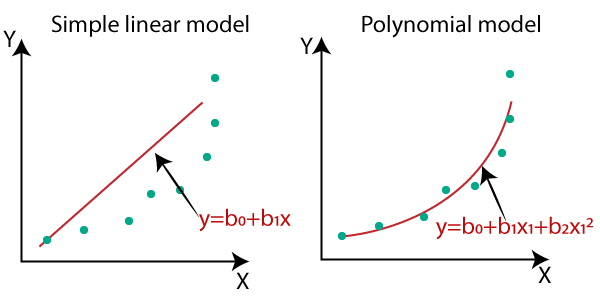

Image Source: Javatpoint

Extra Reading: https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/

https://www.analyticsvidhya.com/blog/2021/10/understanding-polynomial-regression-model/

Datsets: https://www.kaggle.com/datasets/sakshamjn/heightvsweight-for-linear-polynomial-regression/code?datasetId=580391&sortBy=voteCount

We will be implementing the project in 5 parts.

### Part-1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #To create linear regression model
from sklearn.preprocessing import PolynomialFeatures #For transforming the independent variables
from sklearn.metrics import r2_score #For Evaluation
%matplotlib inline

### Part-2: Data Preprocessing

In [2]:
df = pd.read_csv('HeightVsWeight.csv')

In [16]:
df.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [5]:
df.shape

(71, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [10]:
#No duplicate values in dataset
df.duplicated().sum()

0

In [12]:
df.isna().any()
#No NaN values

Age       False
Height    False
dtype: bool

The data is clean. 

Let's study the distribution and relation of the dataset.

In [17]:
df.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


<Figure size 648x648 with 0 Axes>

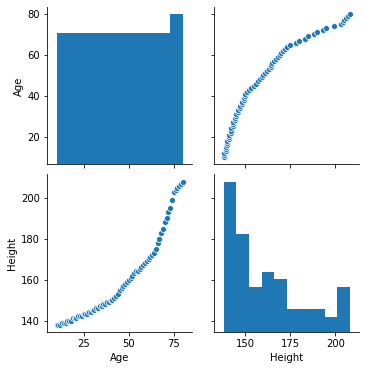

In [14]:
plt.figure(figsize=(9,9))
sns.pairplot(df)
plt.show()

### Part-3: Splitting the dataset into training and test set

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df[['Age']],df['Height'],test_size=0.2,random_state = 1)
#For X we converted to 2-D array as Linear Regression expect 2-D arrayi.e (n_samples, n_features) for independent varaibles. If we don't make it to 2-D, it will throw below error.
#"Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample"

### Part-4: Training the model

In [35]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
print(lr.coef_)
print(lr.intercept_)

[0.94636688]
118.70003909584864


In [45]:
#Lets predict one value from test set
print(X_test.head(1))
print(Y_test.head(1))
y_pred =118.70003909584864 + 0.94636688*75
print('Predicted value: ', y_pred)
error = Y_test.head(1).values-y_pred
print('Error: ', error)


    Age
65   75
65    203
Name: Height, dtype: int64
Predicted value:  189.67755509584865
Error:  [13.3224449]


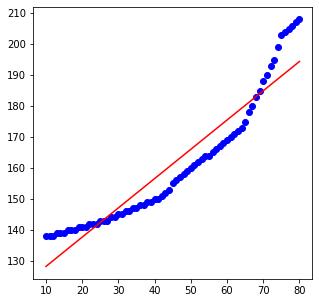

In [52]:
plt.figure(figsize = (5,5))
plt.scatter(df['Age'],df['Height'],color='b')
plt.plot(df['Age'],lr.predict(df[['Age']]),color='r')
plt.show()

In [54]:
#Let's see whether we can decrease this error or not.
#As we can see from above visualization that age and height does not show linear relation. The line is curved. Let increase the degree of independent variable
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,Y_train)
print(lr_poly.coef_)
print(lr_poly.intercept_)

[ 0.         -0.53065462  0.01647885]
144.49911272392265


In [68]:
y_poly_pred = lr_poly.predict(X_test_poly)

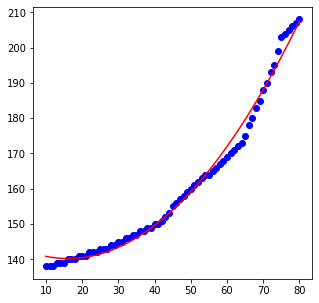

In [67]:
plt.figure(figsize = (5,5))
plt.scatter(df['Age'],df['Height'],color='b')
plt.plot(df['Age'],lr_poly.predict(poly.transform(df[['Age']])),color='r')
plt.show()

### Part-5: Evaluation

In [70]:
r2_score(y_poly_pred,Y_test)

0.9775956205824684